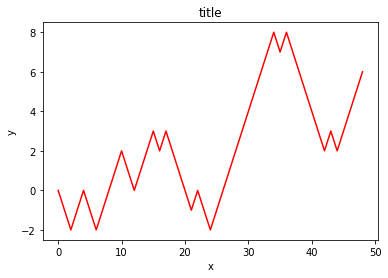

In [19]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from pylab import *

ckey="59djlGCQt8aqbDzm2ShCD2wLV"
csecret="ukE5N7aaAW8T15L9dzF9cR2KC1b45pyvIZV8rrF2ZguXUPxPpb"
atoken="1005798468302958597-OAJEXF1lQHZV5ToWknoGq0R7eEy139"
asecret="wGNHb4R15FBqN8qCZcwUySKfVtDGnvw2HdlW5yngTz5Xv"





x = []
y = []
x_val = 0
y_val = 0
no_of_tweets = 100


def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def sentimentalAnalysis(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    

class listener(StreamListener):
    def on_data(self, data):
        global x 
        global y 
        global x_val 
        global y_val 
        global no_of_tweets 
        all_data = json.loads(data)
        tweet = all_data["text"]
        response = sentimentalAnalysis(tweet)
        if response == 'positive':
            x_val += 1
            y_val += 1
        elif response == 'negative':
            x_val += 1
            y_val -= 1
        x.append(x_val)
        y.append(y_val)
        no_of_tweets -= 1
#         print(str(x_val) + " "+ str(y_val) + " " + response)
        if no_of_tweets == 0:
            figure()
            plot(x, y, 'r')
            xlabel('x')
            ylabel('y')
            title('title')
            show()
            return False
        else:
            return True

    def on_error(self, status):
        print ("Error " + str(status))

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["modi"] )



